
### PREGUNTA SMART

### 1. ¿Cuál es mi objetivo?

SMART: ¿Cuantos y cuales son los insumos que se han comprado en una cantidad distinta a la configurada en el sistema en el último año, de manera que pueda identificar brechas que cerrar para hacer más eficiente el proceso de abastecimiento de materiales?

### 2. Importar las librerías

Una vez se plantea el ejercicio, se procede al cargue de las librerías con las que se trabajará el ejercicio propuesto

In [1]:
#2. Importar librerías 

#Importamos las librerías para el manejo de datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from locale import normalize


#Importamos los paquetes sickit learn para ML

# Libreria para la creación de Pipeline
from sklearn.pipeline import Pipeline

# Importamos un clasificador: Support Vector Classifier
from sklearn.svm import SVC

# Scaler estandar
from sklearn.preprocessing import StandardScaler

# Splitter para partir el dataset en entrenamiento/prueba
from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


### 3. Carga del conjunto de datos

In [215]:
#3. Importar el conjunto de datos

ruta1 = "D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Analisis Exploratorio Datos\Clase 5\CONSULTA_COMPRAS_234.xlsx"
ruta2 = "D:\OneDrive - Tecnoquimicas\99. PERSONAL\Formación\Maestria\Semestre 1\Analisis Exploratorio Datos\Clase 5\CATEGORIA_COMPRAS.xlsx"

#Cargar el dataset
ds1 = pd.read_excel(ruta1) #Dataframe transaccional de compras de insumos en el último año
ds2 = pd.read_excel(ruta2) #Categorización de los insumos en el sistema


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Conditional Formatting extension is not supported and will be removed



#### 3.1. Exploramos ambos datasets y conocemos su estructura


In [3]:
#Dataset transaccional de compras
ds1.info()
ds1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11447 entries, 0 to 11446
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NUM_OC           11444 non-null  float64       
 1   OC               11444 non-null  float64       
 2   ARTICULO         11444 non-null  object        
 3   CODIGO           11444 non-null  object        
 4   DESCRIPCION      11444 non-null  object        
 5   UND_MEDIDA       11444 non-null  object        
 6   CANTIDAD         11445 non-null  float64       
 7   CTD_RECIBIDA     11444 non-null  float64       
 8   CTD_ACEPTADA     11444 non-null  float64       
 9   CTD_RECHAZADA    11444 non-null  float64       
 10  PRECIO           11444 non-null  float64       
 11  IMPORTE          11444 non-null  float64       
 12  MONEDA           11444 non-null  object        
 13  FECHA_CREACION   11444 non-null  datetime64[ns]
 14  FECHA_PROMETIDA  11444 non-null  datet

(11447, 25)

A continuación, se relaciona el diccionario de variables del dataset:

 ###### 0   NUM_OC: Consecutivo generado por el sistema por cada orden de compra generada. Formato número
 ###### 1   OC: Consecutivo generado por el sistema por cada orden de compra generada. Formato texto   
 ###### 2   ARTICULO: Código del insumo en formato texto   
 ###### 3   CODIGO: Código del insumo en formato numero 
 ###### 4   DESCRIPCION: Descripción transaccional del insumo. Descripción corta.
 ###### 5   UND_MEDIDA:  Unidad de medida de compra del insumo   
 ###### 6   CANTIDAD: OQ. Cantidad de compra  
 ###### 7   CTD_RECIBIDA: Cantidad entregada por el proveedor
 ###### 8   CTD_ACEPTADA: Cantidad aceptada de la cantidad recibida
 ###### 9   CTD_RECHAZADA: Cantidad rechazada de la cantidad recibida
 ###### 10  PRECIO: Precio pagado por cada unidad del insumo
 ###### 11  IMPORTE: Total pagado por la orden de compra
 ###### 12  MONEDA: Divisa en la que se genera la compra 
 ###### 13  FECHA_CREACION: Fecha de creación de la solicitud de compra
 ###### 14  FECHA_PROMETIDA: Fecha de necesidad del insumo / Fecha de entrega prometida
 ###### 15  AÑO CREACIÓN:Año de la fecha de creación
 ###### 16  AÑO ENTREGA: Año de la fecha prometida
 ###### 17  PROVEEDOR: Proveedor al que se le generó la solicitud
 ###### 18  COMPRADOR: Comprador que genera la solicitud
 ###### 19  IMPORTADO: Categoría de competitividad del insumo 
 ###### 20  ORG_ENVIO: Organización por la cual se compra
 ###### 21  ESTADO: Estado de la OC
 ###### 22  COMENTARIOS: Comentarios incluidos en el momento de compra. Puede tener información explicativa sobre la transacción.   
 ###### 23  CANCELADA: Flag que indica si la OC fue cancelada
 ###### 24  DIRECCION_ENVIO: Dirección de entrega asociada a la organización de compra.

In [4]:
#Imprimir las primeras filas del dataset
ds1.head()

,NUM_OC,OC,ARTICULO,CODIGO,DESCRIPCION,UND_MEDIDA,CANTIDAD,CTD_RECIBIDA,CTD_ACEPTADA,CTD_RECHAZADA,...,AÑO CREACIÓN,AÑO ENTREGA,PROVEEDOR,COMPRADOR,IMPORTADO,ORG_ENVIO,ESTADO,COMENTARIOS,CANCELADA,DIRECCION_ENVIO
0,101616119.0,101616119.0,1407626,01407626,FENOL USP,Kg,0.0,0.0,0.0,0.0,...,2023.0,2023.0,ANDENEX CHEMIE GMBH,ANLY VIVIAN QUIROGA REY,M16-MATERIA PRIMA IMPORTADA,TQJ,CLOSED,"""Despachar con vida util mayor al 80%.Enviar c...",Y,AUTOPISTA CALI-JAMUNDI KM 23
1,101679751.0,101679751.0,10037339,10037339,"PLEG. TADALAFILO MK 5mg X 10 TAB MMED (CR,NI)",milu,4.0,4.2,4.2,0.0,...,2023.0,2023.0,INDUGRAFICAS S.A.S,LUIS FELIPE MONTERO CAÑAS,M19-MATERIAL EMPAQUE NACIONAL,TQJ,CLOSED,NaN,N,AUTOPISTA CALI-JAMUNDI KM 23
2,101679753.0,101679753.0,10036489,10036489,PLEG. TADALAFILO MK 5mg X 30 TABC (CR-NIC),milu,2.0,2.1,2.1,0.0,...,2023.0,2023.0,INDUGRAFICAS S.A.S,LUIS FELIPE MONTERO CAÑAS,M19-MATERIAL EMPAQUE NACIONAL,TQJ,CLOSED,NaN,N,AUTOPISTA CALI-JAMUNDI KM 23
3,101679754.0,101679754.0,25555556,25555556,META BISULFITO DE SODIO (CONTROLADO),Kg,5.0,5.0,5.0,0.0,...,2023.0,2023.0,PROFINAS SAS,SERGIO OBANDO,M13-MATERIA PRIMA NACIONAL,TQJ,CLOSED,POR FAVOR ENTREGAR EN TECNOQUIMICAS JAMUNDI KM...,NaN,AUTOPISTA CALI-JAMUNDI KM 23
4,101679962.0,101679962.0,49100062,49100062,CAP. 1 AMARILLO-BLANCO,milu,900.0,945.0,945.0,0.0,...,2023.0,2023.0,C I FARMACAPSULAS SAS,MARIA VICTORIA MEJIA BRAVO,M19-MATERIAL EMPAQUE NACIONAL,TQJ,CLOSED,NaN,N,AUTOPISTA CALI-JAMUNDI KM 23


In [117]:
#Dataset categorias de compras
ds2.info()
ds2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26169 entries, 0 to 26168
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PARTE                    26169 non-null  object        
 1   COD                      26169 non-null  object        
 2   DESCRIPCION              26169 non-null  object        
 3   TIPO_PARTE               26166 non-null  object        
 4   UNIDAD_PRIMARIA          26169 non-null  object        
 5   SEGMENTO1                26166 non-null  float64       
 6   PLANEADOR                26130 non-null  object        
 7   Tamaño de lote           3323 non-null   float64       
 8   CANT MINIMA              26169 non-null  float64       
 9   CANTIDAD_PEDIDO_FIJO     942 non-null    float64       
 10  CANTIDAD_MIN_PEDIDO      15941 non-null  float64       
 11  ORGANIZACION             26169 non-null  object        
 12  FECHA_ACT                26169 n

(26169, 30)

Las variables se definen como a continuación:

###### 0  PARTE: Código del insumo en formato texto. 
###### 1  COD  : Código del insumo en formato número.  
###### 2  DESCRIPCION  : Descripción completa del insumo en el sistema.
###### 3  TIPO_PARTE: Tipo de insumo configurado en la maestra
###### 4  UNIDAD_PRIMARIA : Unidad de medida en la que se inventarea el insumo 
###### 5  SEGMENTO1 : Código interno de identificación de la unidad de negocio usuaria del insumo 
###### 6  PLANEADOR : Planeador responsable del insumo
###### 7  Tamaño de lote  : Tamaño de lote del insumo
###### 8  CANT MINIMA  : Cantidad minima del insumo. Calculada
###### 9  CANTIDAD_PEDIDO_FIJO : Cantidad fija en la que se abastece. Depende el recipiente original.
###### 10  CANTIDAD_MIN_PEDIDO  : Mínimo OQ de compra. 
###### 11  ORGANIZACION : Organización del grupo por donde se compra. 
###### 12  FECHA_ACT : Última fecha donde registró activado el insumo. Siempre está actualizado a la fecha. 
###### 13  FIJO : NA  
###### 14  PROCESAMIENTO: Tiempo de procesamiento configurado para la compra del insumo  
###### 15  PROCESAMIENTO_POSTERIOR : Tiempo de postprocesamiento de la mercancía
###### 16  TOTAL_ACUMULADO : Tiempo total. Suma de procesamiento y PostProcesamiento. 
###### 17  CANTIDAD_MAX_PEDIDO  : Cantidad máxima de abastecimiento del insumo.
###### 18  MULTIP_LOTE_FIJO: Cantidad escalar de multiplicación de abastecimiento del insumo. 
###### 19  SEGMENTO2 : Código interno de identificación de la linea asociada a la unidad de negocio usuaria
###### 20  org/ins : NA. Calculada
###### 21  COMPRADOR : Comprador asociado al insumo.  
###### 22  COMPRADOR.1  : Comprador asociado al insumo.
###### 23  COSTO_ESTANDAR  : Costo estándar del insumo 
###### 24  FECHA_CREACION  : Fecha de creación del insumo en el sistema.
###### 25  OQ: Cantidad estándar configurada del insumo. Igual a la cantidad Min.
###### 26  LT COMP : Leadtime total de abastecimiento del insumo. Igual a TOTAL_ACUM
###### 27  VALIDACIÓN: NA 
###### 28  LT: Leadtime total de abastecimiento del insumo. Igual a LT COMP
###### 29  Ultimo proveedor:  proveedor aprobado para el insumo

In [6]:
#Imprimir las primeras filas del dataset
ds2.head()

,PARTE,COD,DESCRIPCION,TIPO_PARTE,UNIDAD_PRIMARIA,SEGMENTO1,PLANEADOR,Tamaño de lote,CANT MINIMA,CANTIDAD_PEDIDO_FIJO,...,org/ins,COMPRADOR,COMPRADOR.1,COSTO_ESTANDAR,FECHA_CREACION,OQ,LT COMP,VALIDACIÓN,LT,Ultimo proveedor
0,10051126,10051126,PLEG CIPROFIBRATO MK 100 mg x 30 TAB (SV-HN-GT...,COMPR,milu,7.0,IHHOLGUIN,NaN,11.0,NaN,...,TQJ/10051126,NaN,LUIS FELIPE MONTERO CAÑAS,0.0,2024-02-26,11.0,38.5,NaN,38.5,NaN
1,10051127,10051127,PLEG CIPROFIBRATO MK 100 mg x 30 TAB (SV-HN-GT...,COMPR,milu,7.0,IHHOLGUIN,NaN,6.0,NaN,...,TQJ/10051127,NaN,LUIS FELIPE MONTERO CAÑAS,0.0,2024-02-26,6.0,38.5,NaN,38.5,NaN
2,10051128,10051128,PLEG CIPROFIBRATO MK 100 mg x 10 TAB (SV-HN-GT...,COMPR,milu,7.0,IHHOLGUIN,NaN,6.0,NaN,...,TQJ/10051128,NaN,LUIS FELIPE MONTERO CAÑAS,0.0,2024-02-26,6.0,38.5,NaN,38.5,NaN
3,10051129,10051129,PLEG CIPROFIBRATO MK 100 mg x 10 TAB (SV-HN-GT...,COMPR,milu,7.0,IHHOLGUIN,NaN,3.0,NaN,...,TQJ/10051129,NaN,LUIS FELIPE MONTERO CAÑAS,0.0,2024-02-26,3.0,38.5,NaN,38.5,NaN
4,10051130,10051130,GE-MULTISOL. OXI X 60 ml,INTERM,milu,8.0,GARODRIGUE,7.8,7.8,NaN,...,TFV/10051130,NaN,NaN,0.0,2024-02-26,7.8,NaN,NaN,0.0,NaN


#### 3.2. Se revisan datos nulos y la pertinencia de las variables

In [7]:
missing_data1 = ds1.isnull()
missing_data1.head(5)


,NUM_OC,OC,ARTICULO,CODIGO,DESCRIPCION,UND_MEDIDA,CANTIDAD,CTD_RECIBIDA,CTD_ACEPTADA,CTD_RECHAZADA,...,AÑO CREACIÓN,AÑO ENTREGA,PROVEEDOR,COMPRADOR,IMPORTADO,ORG_ENVIO,ESTADO,COMENTARIOS,CANCELADA,DIRECCION_ENVIO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
for column in missing_data1.columns.values.tolist():
    print (missing_data1[column].value_counts())
    print ("")

NUM_OC
False    11444
True         3
Name: count, dtype: int64

OC
False    11444
True         3
Name: count, dtype: int64

ARTICULO
False    11444
True         3
Name: count, dtype: int64

CODIGO
False    11444
True         3
Name: count, dtype: int64

DESCRIPCION
False    11444
True         3
Name: count, dtype: int64

UND_MEDIDA
False    11444
True         3
Name: count, dtype: int64

CANTIDAD
False    11445
True         2
Name: count, dtype: int64

CTD_RECIBIDA
False    11444
True         3
Name: count, dtype: int64

CTD_ACEPTADA
False    11444
True         3
Name: count, dtype: int64

CTD_RECHAZADA
False    11444
True         3
Name: count, dtype: int64

PRECIO
False    11444
True         3
Name: count, dtype: int64

IMPORTE
False    11444
True         3
Name: count, dtype: int64

MONEDA
False    11444
True         3
Name: count, dtype: int64

FECHA_CREACION
False    11444
True         3
Name: count, dtype: int64

FECHA_PROMETIDA
False    11444
True         3
Name: count, dtype: i

In [9]:
missing_data2 = ds2.isnull()
missing_data2.head(5)

,PARTE,COD,DESCRIPCION,TIPO_PARTE,UNIDAD_PRIMARIA,SEGMENTO1,PLANEADOR,Tamaño de lote,CANT MINIMA,CANTIDAD_PEDIDO_FIJO,...,org/ins,COMPRADOR,COMPRADOR.1,COSTO_ESTANDAR,FECHA_CREACION,OQ,LT COMP,VALIDACIÓN,LT,Ultimo proveedor
0,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,True,True,False,True


In [10]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")

PARTE
PARTE
False    26169
Name: count, dtype: int64

COD
COD
False    26169
Name: count, dtype: int64

DESCRIPCION
DESCRIPCION
False    26169
Name: count, dtype: int64

TIPO_PARTE
TIPO_PARTE
False    26166
True         3
Name: count, dtype: int64

UNIDAD_PRIMARIA
UNIDAD_PRIMARIA
False    26169
Name: count, dtype: int64

SEGMENTO1
SEGMENTO1
False    26166
True         3
Name: count, dtype: int64

PLANEADOR
PLANEADOR
False    26130
True        39
Name: count, dtype: int64

Tamaño de lote
Tamaño de lote
True     22846
False     3323
Name: count, dtype: int64

CANT MINIMA
CANT MINIMA
False    26169
Name: count, dtype: int64

CANTIDAD_PEDIDO_FIJO
CANTIDAD_PEDIDO_FIJO
True     25227
False      942
Name: count, dtype: int64

CANTIDAD_MIN_PEDIDO
CANTIDAD_MIN_PEDIDO
False    15941
True     10228
Name: count, dtype: int64

ORGANIZACION
ORGANIZACION
False    26169
Name: count, dtype: int64

FECHA_ACT
FECHA_ACT
False    26169
Name: count, dtype: int64

FIJO
FIJO
True     21435
False     4734
Name

#### Observaciones y pasos a seguir:

• Para el dataset transaccional de compras se identifica que existen 3 entradas (filas) que no tiene valores, pues se repite consistentemente en todas las variables. 

• En el dataset de categoría de compras, se evidencia que existen varias columnas las cuales la mayoria son valores nulos o sin registro: 'TAMAÑO DE LOTE','CANTIDAD_PEDIDO_FIJO','FIJO','COMPRADOR','VALIDACIÓN', 'Ultimo proveedor'. Desde el conocimiento que se tiene del negocio y comprendiendo el objetivo del ejercicio, se entienden que son variables que no aportan al modelo y se deciden descartar.

• Por otro lado, se evidencia que existen variables de identificación configuradas en dígitos que se encuentran tanto en formato objeto como número. Se decide trabajar con el objeto, de manera que se trate de forma categórica y no afecte cuantitativamente el modelo: NUM OC / OC; CÓDIGO / PARTE / ARTICULO. 

• Existen variables que están erroneamente nombradas. Se debe ajustar ambos dataset para que sean más 'dicientes'.

• El estado de la OC no aporta información relevante para el ejercicio.

• Existen variables repetidas en ambos dataset compuesta de 'strings'. Con el fin de evitar conflictos innecesarios en el merge, se decide descartarla de alguno de los dataset y usar las variables de identificación del insumo de composición numérica (OC/PARTE) para consolidar base de datos, evitando el esfuerzo de hacer coincidir nombres y descripciones.

• Se mantiene la descripción del dataset de categoría de compras pues corresponde a la descripción completa del artículo en el sistema. 

•El dataset de compras es transaccional, por lo que puede presentar varios registros del mismo insumo más de una vez. El dataset de categoría, es un inventario de códigos de insumos y las diferentes categorías asignadas en el sistema transaccional de compras; Se repiten entre sí, si están alojados en distintas organizaciones.


#### 3.3. Merge de los datasets

Se procede a limpiar los datasets de la información no relevante identificada en el apartado anterior, y se procede a unir ambos datasets

In [216]:
#Elimino columnas que no son relevantes para el ejercicio o son redundantes
ds1.drop(columns=['NUM_OC','DESCRIPCION','ESTADO','DIRECCION_ENVIO','CTD_ACEPTADA','CTD_RECHAZADA','CTD_RECIBIDA','IMPORTE','ORG_ENVIO'], inplace=True)
ds2.drop(columns=['UNIDAD_PRIMARIA','Tamaño de lote','CANTIDAD_PEDIDO_FIJO','CANT MINIMA','CANTIDAD_MIN_PEDIDO','CANTIDAD_MAX_PEDIDO','FECHA_ACT','FIJO','PROCESAMIENTO_POSTERIOR','TOTAL_ACUMULADO','org/ins','COMPRADOR','COMPRADOR.1','LT COMP',
  'VALIDACIÓN','Ultimo proveedor'],inplace=True)

In [127]:
#Corroboro que haya quedada modificada la estructura del dataset
ds1.info()
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11447 entries, 0 to 11446
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OC               11444 non-null  float64       
 1   ARTICULO         11444 non-null  object        
 2   CODIGO           11444 non-null  object        
 3   UND_MEDIDA       11444 non-null  object        
 4   CANTIDAD         11445 non-null  float64       
 5   PRECIO           11444 non-null  float64       
 6   MONEDA           11444 non-null  object        
 7   FECHA_CREACION   11444 non-null  datetime64[ns]
 8   FECHA_PROMETIDA  11444 non-null  datetime64[ns]
 9   AÑO CREACIÓN     11444 non-null  float64       
 10  AÑO ENTREGA      11444 non-null  float64       
 11  PROVEEDOR        11444 non-null  object        
 12  COMPRADOR        11444 non-null  object        
 13  IMPORTADO        11444 non-null  object        
 14  COMENTARIOS      2785 non-null   objec

In [217]:
ds2.drop(columns=['CANTIDAD_MAX_PEDIDO'],inplace=True)

In [218]:
#Se modifican los rotulos de las columnas para hacerlas coincidir
header_ds1=['OC','CODIGO','PARTE','UDM','OQ','PRECIO','MONEDA',
    'FECHA_OC','FECHA_PROMESA','AÑO_OC','AÑO_ENTREGA','PROVEEDOR','COMPRADOR','IMPORTADO',
    'COMENTARIOS','CANCELADA']
ds1.columns = header_ds1

header_ds2 =['PARTE','CODIGO','DESCRIPCION','TIPO_INSUMO','UN','PLANEADOR','ORG','LT_PROV',
             'MULTP_LOTE','LINEA','COSTO_STD','FECHA_CREACION_ART','OQ_CONFIG','LT']
ds2.columns = header_ds2

#Se verifica que hayan quedado los rótulos
ds1.info()
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11447 entries, 0 to 11446
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OC             11444 non-null  float64       
 1   CODIGO         11444 non-null  object        
 2   PARTE          11444 non-null  object        
 3   UDM            11444 non-null  object        
 4   OQ             11445 non-null  float64       
 5   PRECIO         11444 non-null  float64       
 6   MONEDA         11444 non-null  object        
 7   FECHA_OC       11444 non-null  datetime64[ns]
 8   FECHA_PROMESA  11444 non-null  datetime64[ns]
 9   AÑO_OC         11444 non-null  float64       
 10  AÑO_ENTREGA    11444 non-null  float64       
 11  PROVEEDOR      11444 non-null  object        
 12  COMPRADOR      11444 non-null  object        
 13  IMPORTADO      11444 non-null  object        
 14  COMENTARIOS    2785 non-null   object        
 15  CANCELADA      9941

In [219]:
#Se procede con el merge de ambos datasets

merged = pd.merge(ds1, ds2, on=['PARTE','CODIGO'])

#Analizo la estructura del nuevo dataset creado
merged.shape
merged.info()
merged.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OC                  15042 non-null  float64       
 1   CODIGO              15042 non-null  object        
 2   PARTE               15042 non-null  object        
 3   UDM                 15042 non-null  object        
 4   OQ                  15042 non-null  float64       
 5   PRECIO              15042 non-null  float64       
 6   MONEDA              15042 non-null  object        
 7   FECHA_OC            15042 non-null  datetime64[ns]
 8   FECHA_PROMESA       15042 non-null  datetime64[ns]
 9   AÑO_OC              15042 non-null  float64       
 10  AÑO_ENTREGA         15042 non-null  float64       
 11  PROVEEDOR           15042 non-null  object        
 12  COMPRADOR           15042 non-null  object        
 13  IMPORTADO           15042 non-null  object    

OC                           float64
CODIGO                        object
PARTE                         object
UDM                           object
OQ                           float64
PRECIO                       float64
MONEDA                        object
FECHA_OC              datetime64[ns]
FECHA_PROMESA         datetime64[ns]
AÑO_OC                       float64
AÑO_ENTREGA                  float64
PROVEEDOR                     object
COMPRADOR                     object
IMPORTADO                     object
COMENTARIOS                   object
CANCELADA                     object
DESCRIPCION                   object
TIPO_INSUMO                   object
UN                           float64
PLANEADOR                     object
ORG                           object
LT_PROV                      float64
MULTP_LOTE                   float64
LINEA                        float64
COSTO_STD                    float64
FECHA_CREACION_ART    datetime64[ns]
OQ_CONFIG                    float64
L

Se obtiene un nuevo dataset de 37 columnas y 15042 entradas. Procedo a descomponer las fechas de cada transacción en meses y días para facilitar el análisis. Además, se conviertes variables almacenadas como numéricas y que en realidad sirven de identificador

In [220]:
#Separo las fechas en sus distintos componentes para hacer 

merged['MES_CREACION'] = pd.to_datetime(merged['FECHA_OC']).dt.month
merged['DIA_CREACION'] = pd.to_datetime(merged['FECHA_OC']).dt.day

merged['MES_PROMESA'] = pd.to_datetime(merged['FECHA_PROMESA']).dt.month
merged['DIA_PROMESA'] = pd.to_datetime(merged['FECHA_PROMESA']).dt.day

merged['AÑO_OC'] = pd.to_datetime(merged['FECHA_OC']).dt.year
merged['AÑO_ENTREGA'] = pd.to_datetime(merged['FECHA_PROMESA']).dt.year

merged['FECHA_CREACION_ART'] = pd.to_datetime(merged['FECHA_CREACION_ART']).dt.date

merged.drop(columns=['FECHA_OC','FECHA_PROMESA'],inplace=True)
merged.info

# Convierto las variables de codificación numérica que actuan como etiquetas a objetos

merged['OC'] = merged['OC'].astype(object)
merged['UN'] = merged['UN'].astype(object)
merged['LINEA'] = merged['LINEA'].astype(object)
merged['AÑO_OC'] = merged['AÑO_OC'].astype(object)
merged['AÑO_ENTREGA'] = merged['AÑO_ENTREGA'].astype(object)
merged['MES_PROMESA'] = merged['MES_PROMESA'].astype(object)
merged['MES_CREACION'] = merged['MES_CREACION'].astype(object)
merged['DIA_PROMESA'] = merged['DIA_PROMESA'].astype(object)
merged['DIA_CREACION'] = merged['DIA_CREACION'].astype(object)



Se procede a convertir en categorícas las variables de identificación 

In [226]:
#Me aseguro de que se modificó el dataset como se buscaba
merged.info()
merged.shape

# Se calculan las estadísticas descriptivas del nuevo dataset generado
merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OC                  15042 non-null  object 
 1   CODIGO              15042 non-null  object 
 2   PARTE               15042 non-null  object 
 3   UDM                 15042 non-null  object 
 4   OQ                  15042 non-null  float64
 5   PRECIO              15042 non-null  float64
 6   MONEDA              15042 non-null  object 
 7   AÑO_OC              15042 non-null  object 
 8   AÑO_ENTREGA         15042 non-null  object 
 9   PROVEEDOR           15042 non-null  object 
 10  COMPRADOR           15042 non-null  object 
 11  IMPORTADO           15042 non-null  object 
 12  COMENTARIOS         4057 non-null   object 
 13  CANCELADA           12418 non-null  object 
 14  DESCRIPCION         15042 non-null  object 
 15  TIPO_INSUMO         15015 non-null  object 
 16  UN  

,OQ,PRECIO,LT_PROV,MULTP_LOTE,COSTO_STD,OQ_CONFIG,LT
count,15042.000000,1.504200e+04,12916.000000,7812.000000,1.504200e+04,15042.000000,15042.000000
mean,1665.918285,5.791627e+05,39.912086,784.380256,9.968043e+05,1245.170843,42.985068
std,11576.832396,1.570801e+06,30.570710,4474.783257,1.131766e+07,11013.359285,40.671486
min,0.000000,7.000000e-02,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,4.979049e+04,26.000000,1.000000,6.986547e+04,1.000000,18.500000
50%,20.000000,1.960000e+05,35.000000,2.000000,2.499000e+05,9.000000,38.000000
75%,150.000000,6.240000e+05,45.000000,27.300000,7.687784e+05,86.000000,48.500000
max,460000.000000,9.371900e+07,365.000000,50000.000000,7.980000e+08,460000.000000,410.000000


Se identifica la cantidad de datos nulos por columna

In [146]:
#Reviso los datos nulos
missing_data = merged.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

OC
False    15042
Name: count, dtype: int64

CODIGO
False    15042
Name: count, dtype: int64

PARTE
False    15042
Name: count, dtype: int64

UDM
False    15042
Name: count, dtype: int64

OQ
False    15042
Name: count, dtype: int64

PRECIO
False    15042
Name: count, dtype: int64

MONEDA
False    15042
Name: count, dtype: int64

AÑO_OC
False    15042
Name: count, dtype: int64

AÑO_ENTREGA
False    15042
Name: count, dtype: int64

PROVEEDOR
False    15042
Name: count, dtype: int64

COMPRADOR
False    15042
Name: count, dtype: int64

IMPORTADO
False    15042
Name: count, dtype: int64

COMENTARIOS
True     10985
False     4057
Name: count, dtype: int64

CANCELADA
False    12418
True      2624
Name: count, dtype: int64

DESCRIPCION
False    15042
Name: count, dtype: int64

TIPO_INSUMO
False    15015
True        27
Name: count, dtype: int64

UN
False    15015
True        27
Name: count, dtype: int64

PLANEADOR
False    14764
True       278
Name: count, dtype: int64

ORG
False    15042
Name:

Se procede a dividir el data set en dos, separando las variables categóricas de las cuantitativas

In [227]:
merged_cat = merged.select_dtypes(include=[object])
merged_cat.info()
merged_num = merged.select_dtypes(exclude=[object])
merged_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OC                  15042 non-null  object
 1   CODIGO              15042 non-null  object
 2   PARTE               15042 non-null  object
 3   UDM                 15042 non-null  object
 4   MONEDA              15042 non-null  object
 5   AÑO_OC              15042 non-null  object
 6   AÑO_ENTREGA         15042 non-null  object
 7   PROVEEDOR           15042 non-null  object
 8   COMPRADOR           15042 non-null  object
 9   IMPORTADO           15042 non-null  object
 10  COMENTARIOS         4057 non-null   object
 11  CANCELADA           12418 non-null  object
 12  DESCRIPCION         15042 non-null  object
 13  TIPO_INSUMO         15015 non-null  object
 14  UN                  15015 non-null  object
 15  PLANEADOR           14764 non-null  object
 16  ORG                 15

Se genera un nuevo dataset con solo las variables categóricas. Elimino las variables que no son relevantes o contienen datos sensibles para iniciar con el análisis gráfico

In [228]:
#Elimino las variables que no son relevantes o contienen datos sensibles
merged_cat.drop(columns=['OC','CODIGO','PARTE','PROVEEDOR','COMENTARIOS','DESCRIPCION','LINEA','FECHA_CREACION_ART'],inplace=True)
merged_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UDM           15042 non-null  object
 1   MONEDA        15042 non-null  object
 2   AÑO_OC        15042 non-null  object
 3   AÑO_ENTREGA   15042 non-null  object
 4   COMPRADOR     15042 non-null  object
 5   IMPORTADO     15042 non-null  object
 6   CANCELADA     12418 non-null  object
 7   TIPO_INSUMO   15015 non-null  object
 8   UN            15015 non-null  object
 9   PLANEADOR     14764 non-null  object
 10  ORG           15042 non-null  object
 11  MES_CREACION  15042 non-null  object
 12  DIA_CREACION  15042 non-null  object
 13  MES_PROMESA   15042 non-null  object
 14  DIA_PROMESA   15042 non-null  object
dtypes: object(15)
memory usage: 1.7+ MB


#### 3.4 Analisis gráfico (univariado y multivariado)

Se hace una matriz de gráficos de dispersion entre las variables cuantitativas

array([[<AxesSubplot:xlabel='OQ', ylabel='OQ'>,
        <AxesSubplot:xlabel='PRECIO', ylabel='OQ'>,
        <AxesSubplot:xlabel='LT_PROV', ylabel='OQ'>,
        <AxesSubplot:xlabel='MULTP_LOTE', ylabel='OQ'>,
        <AxesSubplot:xlabel='COSTO_STD', ylabel='OQ'>,
        <AxesSubplot:xlabel='OQ_CONFIG', ylabel='OQ'>,
        <AxesSubplot:xlabel='LT', ylabel='OQ'>],
       [<AxesSubplot:xlabel='OQ', ylabel='PRECIO'>,
        <AxesSubplot:xlabel='PRECIO', ylabel='PRECIO'>,
        <AxesSubplot:xlabel='LT_PROV', ylabel='PRECIO'>,
        <AxesSubplot:xlabel='MULTP_LOTE', ylabel='PRECIO'>,
        <AxesSubplot:xlabel='COSTO_STD', ylabel='PRECIO'>,
        <AxesSubplot:xlabel='OQ_CONFIG', ylabel='PRECIO'>,
        <AxesSubplot:xlabel='LT', ylabel='PRECIO'>],
       [<AxesSubplot:xlabel='OQ', ylabel='LT_PROV'>,
        <AxesSubplot:xlabel='PRECIO', ylabel='LT_PROV'>,
        <AxesSubplot:xlabel='LT_PROV', ylabel='LT_PROV'>,
        <AxesSubplot:xlabel='MULTP_LOTE', ylabel='LT_PROV'>,
       

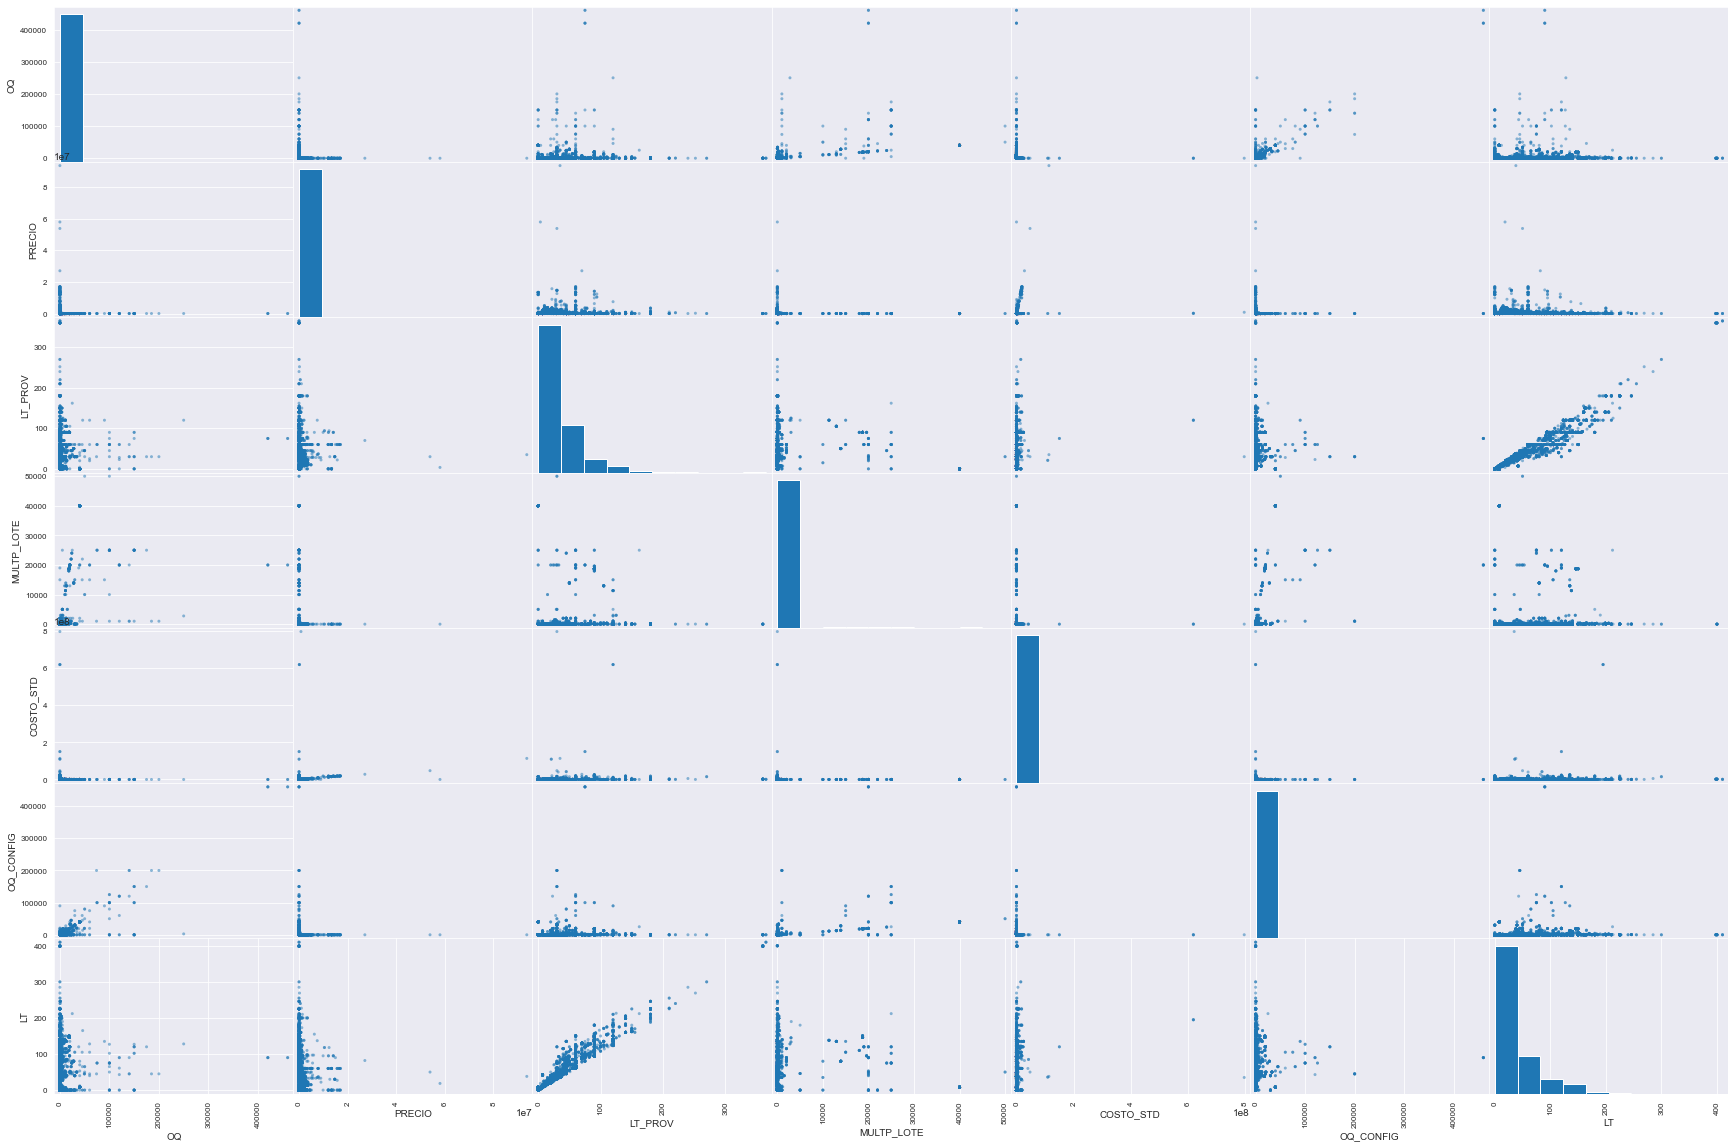

In [252]:
from pandas.plotting import scatter_matrix
scatter_matrix(merged_num, figsize=(30,20), alpha = 0.5)

In [164]:

#Se genera una lista de variables categoricas
cat_col_name = merged_cat.columns.tolist()
print(cat_col_name)
cat_chart_n = len(cat_col_name)
print(cat_chart_n)
print(range(cat_chart_n))

['UDM', 'MONEDA', 'COMPRADOR', 'IMPORTADO', 'CANCELADA', 'TIPO_INSUMO', 'UN', 'PLANEADOR', 'ORG']
9
range(0, 9)


Procedemos a construir los gráficos univariados de distribución de las variables categoricas.

Se adelante después el análisis de las variables numéricas relevantes

C:\Users\User\AppData\Local\Temp\ipykernel_75808\3064829802.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3064829802.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3064829802.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3064829802.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

<AxesSubplot:xlabel='IMPORTADO', ylabel='count'>

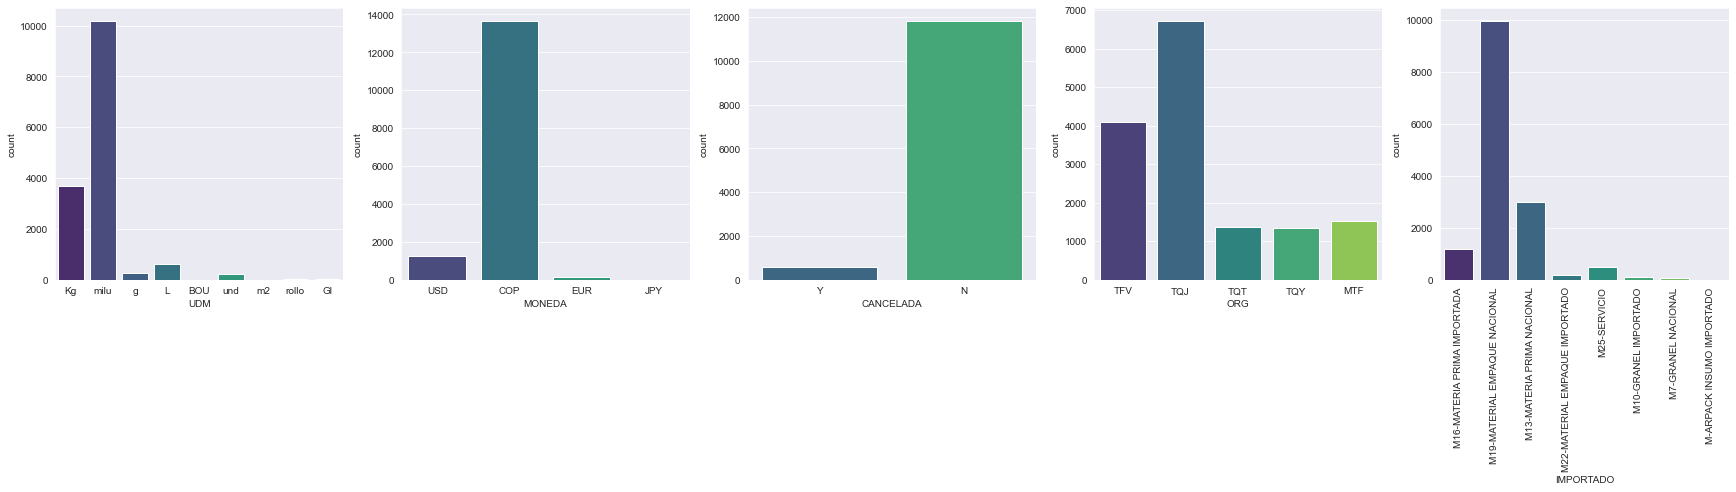

In [242]:
#Seteo del estilo de los gráficos
sb.set_style('darkgrid')

fig, axes = mp.subplots(ncols=5, figsize=(30, 5))

for i in fig, axes:
    mp.xticks(rotation=90)

sb.countplot(x='UDM', data=merged_cat, ax=axes[0], palette='viridis',)
sb.countplot(x='MONEDA', data=merged_cat, ax=axes[1], palette='viridis')
sb.countplot(x='CANCELADA', data=merged_cat, ax=axes[2], palette='viridis')
sb.countplot(x='ORG', data=merged_cat, ax=axes[3], palette='viridis')
sb.countplot(x='IMPORTADO', data=merged_cat, ax=axes[4], palette='viridis')


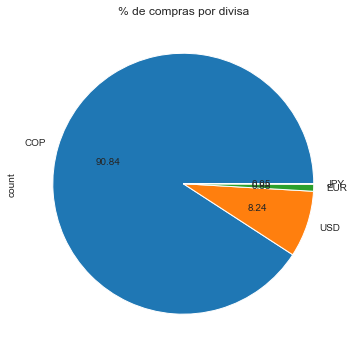

In [247]:
plot_cancel = merged_cat['MONEDA'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='% de compras por divisa', )

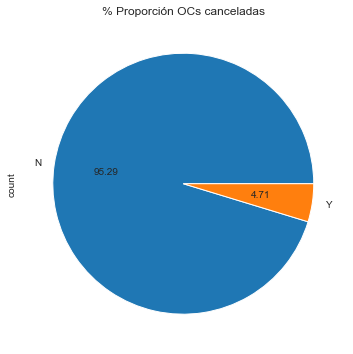

In [253]:
plot_cancel = merged_cat['CANCELADA'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='% de OCs canceladas', )


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3329982157.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3329982157.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3329982157.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3329982157.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same eff

<AxesSubplot:xlabel='count', ylabel='TIPO_INSUMO'>

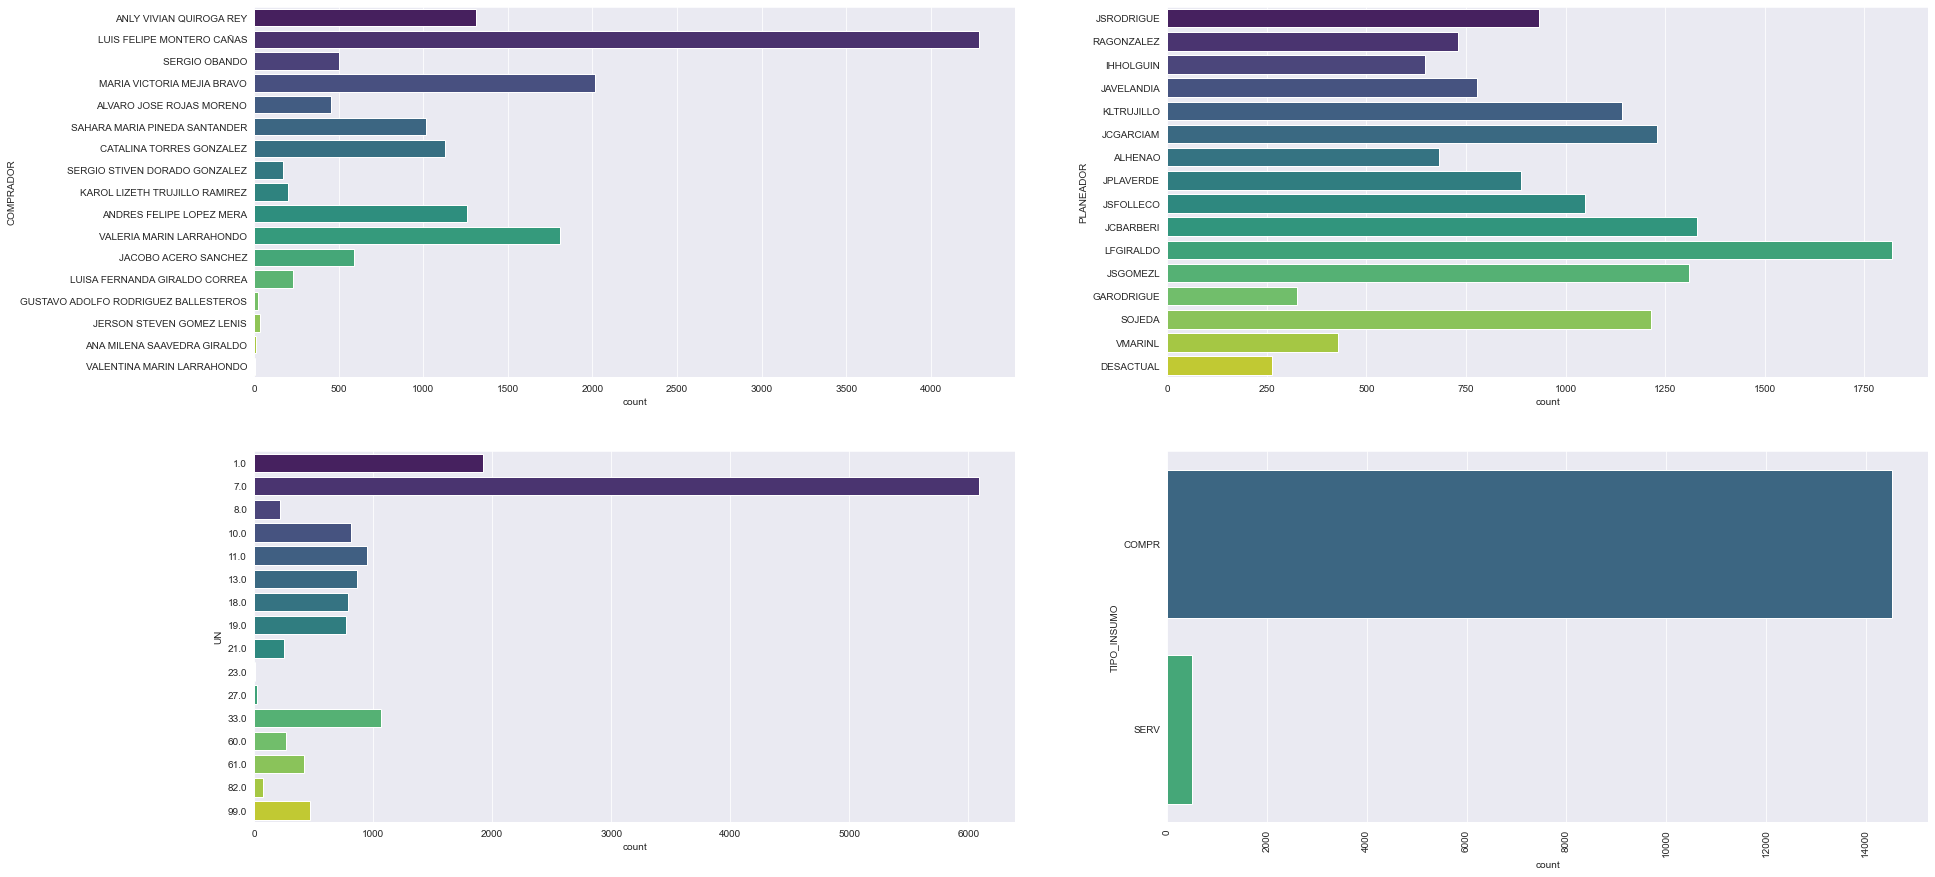

In [246]:
#Seteo del estilo de los gráficos
sb.set_style('darkgrid')

fig, axes = mp.subplots(nrows=2, ncols=2, figsize=(30, 15))

for i in fig, axes:
    mp.xticks(rotation=90)

sb.countplot(y='COMPRADOR', data=merged_cat, ax=axes[0,0], palette='viridis',)
sb.countplot(y='PLANEADOR', data=merged_cat, ax=axes[0,1], palette='viridis')
sb.countplot(y='UN', data=merged_cat, ax=axes[1,0], palette='viridis')
sb.countplot(y='TIPO_INSUMO', data=merged_cat, ax=axes[1,1], palette='viridis')


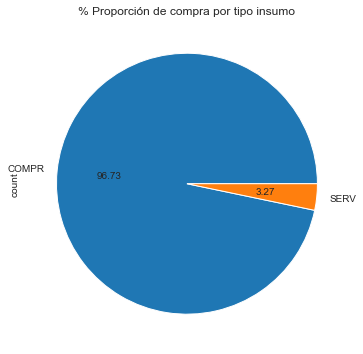

In [249]:
plot_ti = merged_cat['TIPO_INSUMO'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='% Proporción de compra por tipo insumo')


In [232]:
merged_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UDM           15042 non-null  object
 1   MONEDA        15042 non-null  object
 2   AÑO_OC        15042 non-null  object
 3   AÑO_ENTREGA   15042 non-null  object
 4   COMPRADOR     15042 non-null  object
 5   IMPORTADO     15042 non-null  object
 6   CANCELADA     12418 non-null  object
 7   TIPO_INSUMO   15015 non-null  object
 8   UN            15015 non-null  object
 9   PLANEADOR     14764 non-null  object
 10  ORG           15042 non-null  object
 11  MES_CREACION  15042 non-null  object
 12  DIA_CREACION  15042 non-null  object
 13  MES_PROMESA   15042 non-null  object
 14  DIA_PROMESA   15042 non-null  object
dtypes: object(15)
memory usage: 1.7+ MB


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3284879845.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3284879845.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3284879845.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_75808\3284879845.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

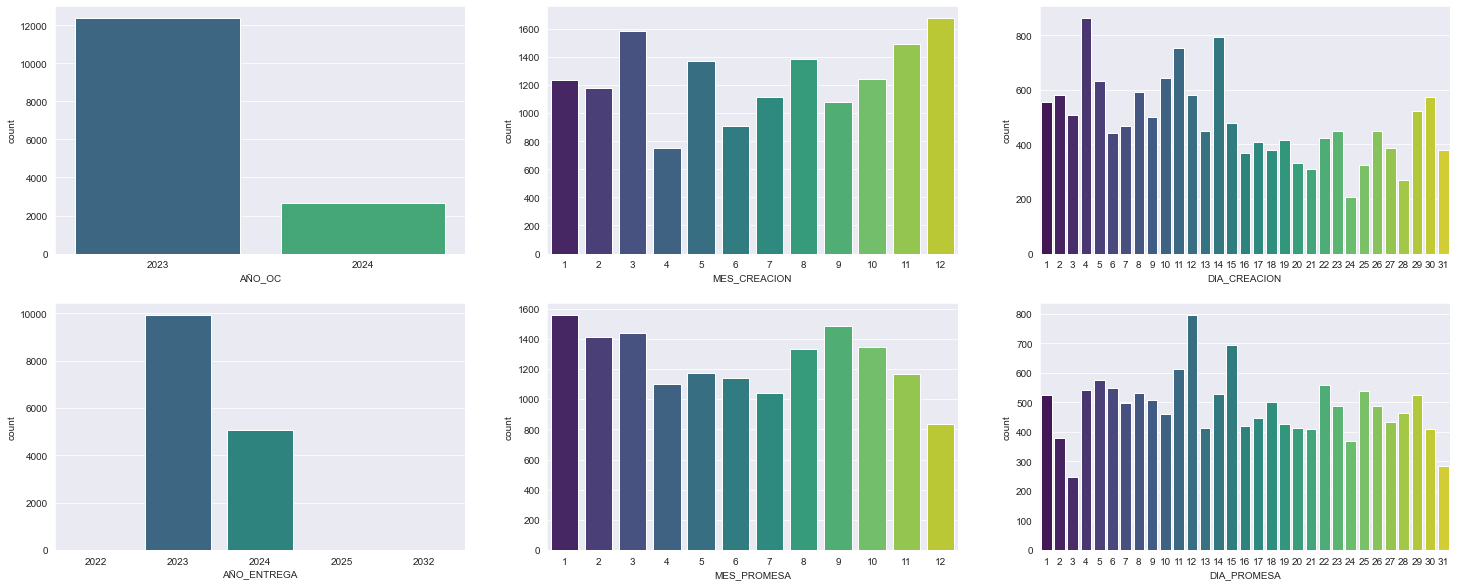

In [257]:
fig, axes = mp.subplots(nrows=2, ncols=3, figsize=(25, 10))


#Seteo del estilo de los gráficos
sb.set_style('darkgrid')


sb.countplot(x='AÑO_OC', data=merged_cat, ax=axes[0,0], palette='viridis',)
sb.countplot(x='MES_CREACION', data=merged_cat, ax=axes[0,1], palette='viridis')
sb.countplot(x='DIA_CREACION', data=merged_cat, ax=axes[0,2], palette='viridis')
sb.countplot(x='AÑO_ENTREGA', data=merged_cat, ax=axes[1,0], palette='viridis')
sb.countplot(x='MES_PROMESA', data=merged_cat, ax=axes[1,1], palette='viridis')
sb.countplot(x='DIA_PROMESA', data=merged_cat, ax=axes[1,2], palette='viridis')
#Se evidencia un sesgo a la izquierda. Debido a la cantidad de la información y los valores, la gráfica no tiene mucho impacto, 
#pero me dice que la mayoría de las compras se ubican por debajo de los 100 millones 




mp.show()

#### **Resumen y hallazgos**

Se evidencia que: 

> • La mayoría de materiales que se compran se compran en unidades (milu), seguido de las compras en Kg y L. Esto nos da un indicio de los tipos de materiales comprados.

> • La mayoría de las transacciones de compras corresponden a materiales y solo una pequeña proporción hace servicios. 

> • Existen entradas en la variable 'CANCELADA' que están vacías, y no se contabilizan dentro de la proporción. 

> • El mayor volumen de compra corresponde a material de empaque, que se relaciona con el gran volumen de compra en unidades vs la compra en Kg.

> • La mayoría de las compras de bienes y servicios se hace a través de la organización TQJ, que es la operación más grande, seguida de TFV.

> • Las UN con mayores compras relacionadas son las 01 y 07, que corresponden a los medicamentos éticos, seguido del 033, que corresponde a cuidado personal.

> • Para la variable 'IMPORTE' se evidencia un sesgo a la izquierda. Debido a la cantidad de la información y los valores, la gráfica no tiene mucho impacto, pero me dice que la mayoría de las compras se ubican por debajo de los 100 millones.

> • Se evidencia que para la variable leadtime existen muchos valores configurados en 0 que claramente están erróneos. Existe ademas datos atípicos cercanos a las 400 días que deben ser revisados. Se puede concluir que el tiempo medio que toma abastecerse de materiales está por debajo de los 100 días.

> • La mayoría de las compras se hacen en los meses de marzo y finales de año. Esto está posiblemente relacionado a la parada de operaciones de fin de año y puesta a punto de las plataformas productivas al inicio de año. 

> • Consecuente con esto, se puede notar que las mayores entregas de mercancía se pactan a inicio de año, consecuencia del volumen de compra del final de año. Por la misma razón, en los últimos meses se reduce la recepción de materiales.

**Preparación de una nueva columna para el análisis**


Comprendiendo la situación problema, se crea una nueva columna que relaciona las transacciones donde coincide la cantidad comprada (OQ) con la cantidad configurada en el sistema (OQ_CONFIG), la cual será la variable a predecir

In [259]:
merged['COINCIDE'] = merged['OQ'] == merged['OQ_CONFIG']
merged['COINCIDE'].unique

<bound method Series.unique of 0         True
1        False
2        False
3        False
4        False
         ...  
15037    False
15038    False
15039     True
15040     True
15041    False
Name: COINCIDE, Length: 15042, dtype: bool>

Convierto el array de booleano a int y después en variable categórica

In [260]:
merged['COINCIDE'] = merged['COINCIDE'].astype(int) #Convierto de booleano a interger
merged['COINCIDE'] = merged['COINCIDE'].astype(object) #Convierto el interger en una variable categórica de 0 & 1
merged['COINCIDE'].unique

<bound method Series.unique of 0        1
1        0
2        0
3        0
4        0
        ..
15037    0
15038    0
15039    1
15040    1
15041    0
Name: COINCIDE, Length: 15042, dtype: object>

In [261]:
merged['COINCIDE'].head(5)
merged['COINCIDE'].tail(5)

15037    0
15038    0
15039    1
15040    1
15041    0
Name: COINCIDE, dtype: object

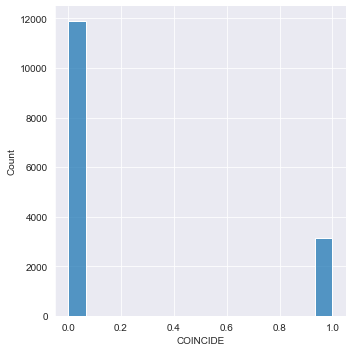

In [262]:
sb.displot(data = merged, x = 'COINCIDE')
mp.show()

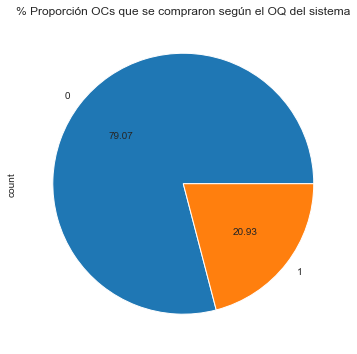

In [263]:
plot_coin = merged['COINCIDE'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='% Proporción OCs que se compraron según el OQ del sistema')

Evaluamos la interacción entre las variables



AttributeError: 'list' object has no attribute 'yaxis'

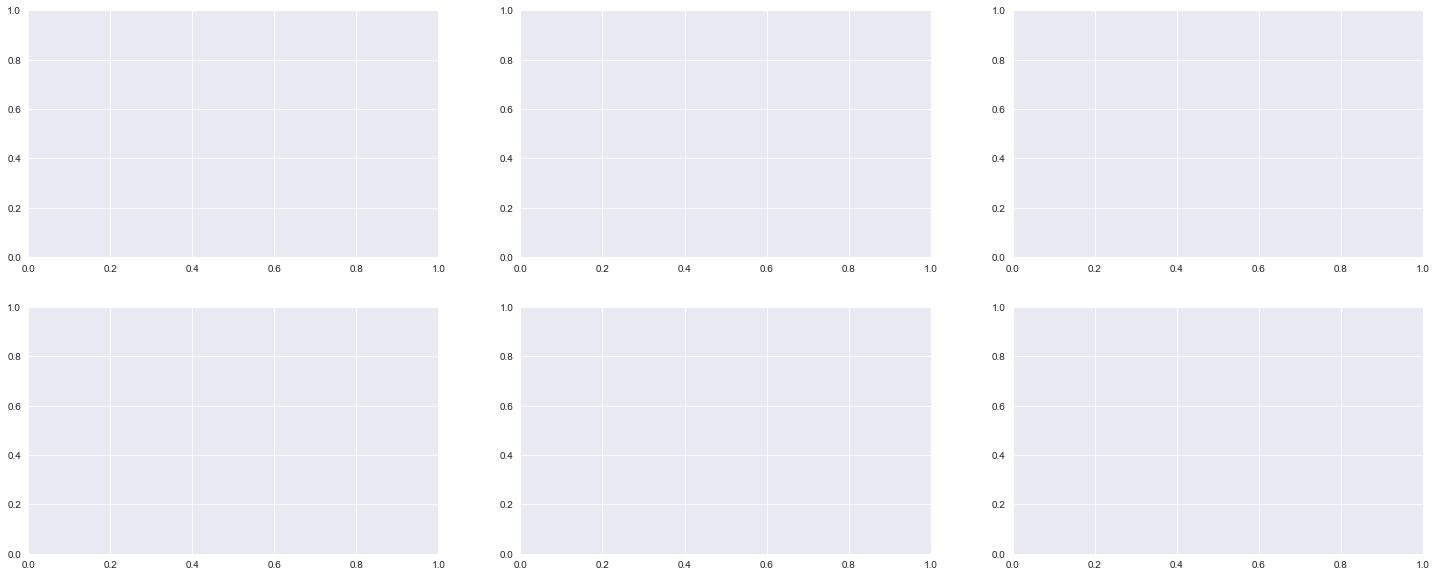

In [269]:

fig, axes = mp.subplots(nrows=2, ncols=3, figsize=(25, 10))

sb.boxplot(data = merged, x = 'UDM', y='PRECIO', hue = 'COINCIDE',ax=[0,0])
sb.boxplot(data = merged, x = 'UDM', y = 'OQ', hue = 'COINCIDE', ax=[0,1] ,dodge = True)
sb.boxplot(data = merged, x = 'UDM', y = 'LT_PROV', hue = 'COINCIDE', ax=[0,2] ,dodge = True)
sb.boxplot(data = merged, x = 'UDM', y = 'LT', hue = 'COINCIDE', ax=[1,0] ,dodge = True)
sb.boxplot(data = merged, x = 'UDM', y = 'LT_PROV', hue = 'COINCIDE', ax=[1,1] ,dodge = True)
sb.countplot(x='DIA_PROMESA', data=merged_cat, ax=axes[1,2], palette='viridis')
mp.show()

<AxesSubplot:xlabel='UDM', ylabel='IMPORTE'>

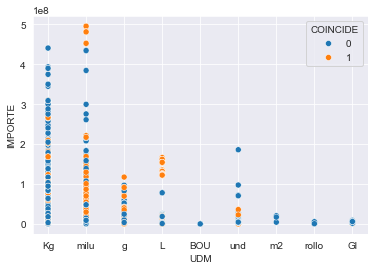

In [53]:
sb.scatterplot(data=merged, x="UDM", y="IMPORTE", hue='COINCIDE')

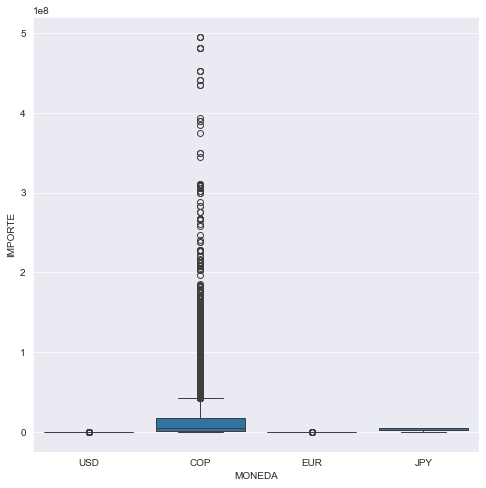

In [54]:
# Se evalúa la dispersión del importe por tipo de monera

mp.figure(figsize = (8,8)) 
sb.boxplot(data = merged, x = 'MONEDA', y = 'IMPORTE', dodge = True)
mp.show()

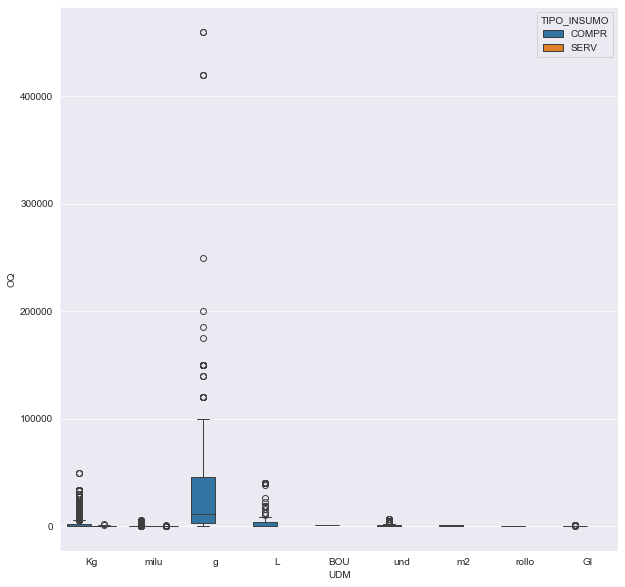

In [55]:
mp.figure(figsize = (10,10)) 
sb.boxplot(data = merged, x = 'UDM', y = 'OQ', hue = 'TIPO_INSUMO', dodge = True)
mp.show()

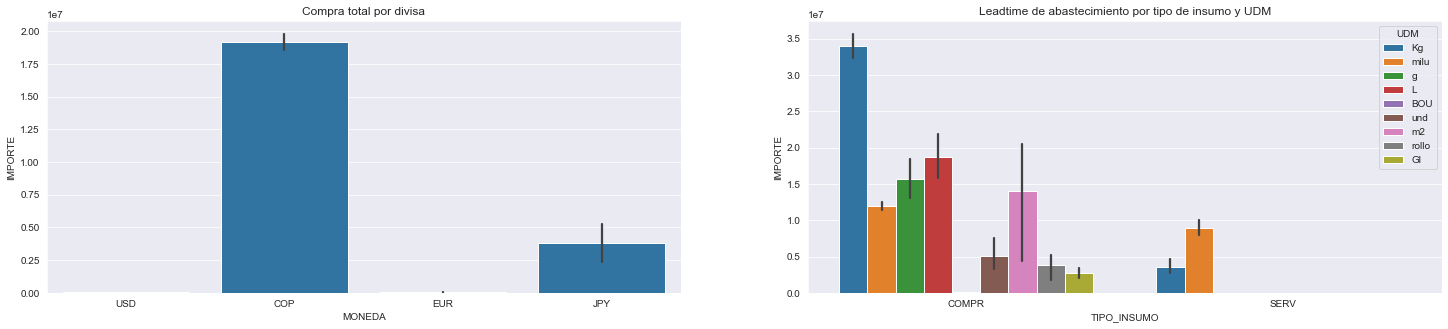

In [56]:
fig, axes = mp.subplots(ncols=2, figsize=(25, 5))

sb.barplot(data = merged, x = 'MONEDA', y = 'IMPORTE', ax=axes[0])
sb.barplot(data = merged, x = 'TIPO_INSUMO', y = 'IMPORTE', hue='UDM', ax=axes[1])


axes[0].set_title('Compra total por divisa')
axes[1].set_title('Leadtime de abastecimiento por tipo de insumo y UDM')

mp.show()

Se grafica la distribución de los OQ de las compras cuyas cantidades coinciden o no a las configuradas en la maestra y la unidad de medida en la que se compra el material, de manera que se descompongan los valores en categorías heterogéneas entre sí y sus relaciones entre sí.

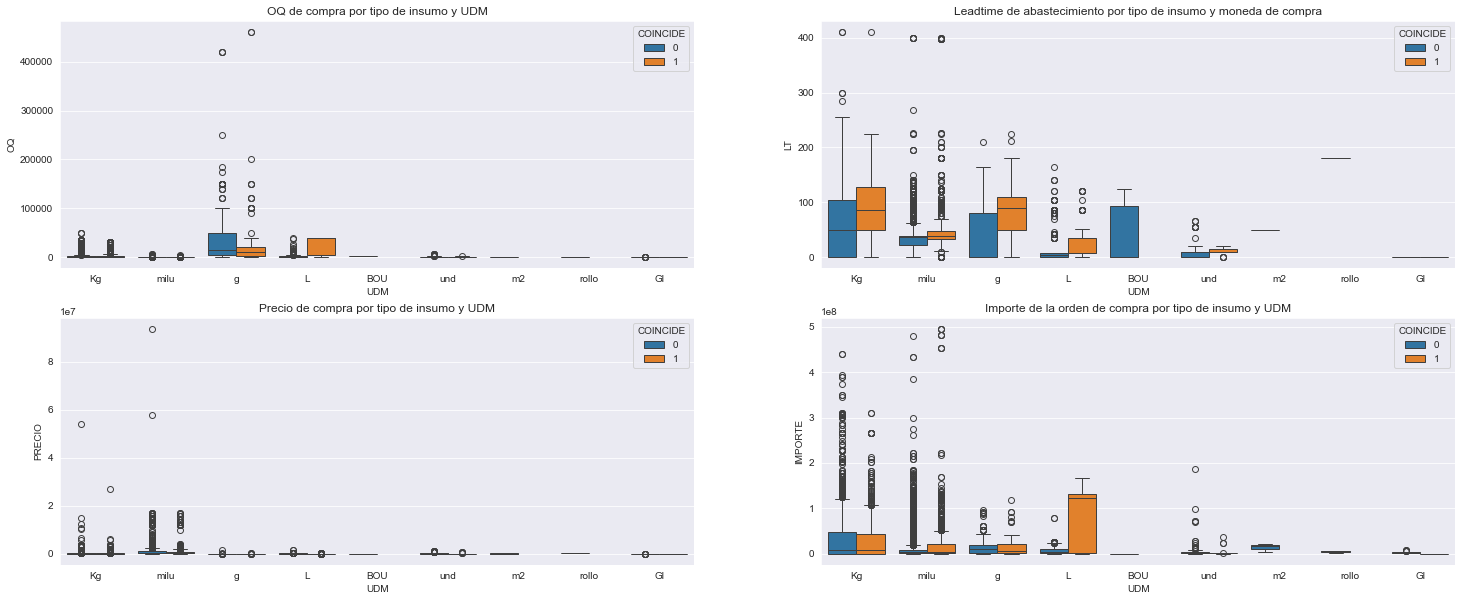

In [57]:
fig, axes = mp.subplots(nrows=2,ncols=2, figsize=(25, 10))

sb.boxplot(data = merged, x = 'UDM', y = 'OQ', hue = 'COINCIDE', dodge = True, ax=axes[0,0])
sb.boxplot(data = merged, x = 'UDM', y = 'LT', hue = 'COINCIDE', dodge = True, ax=axes[0,1])
sb.boxplot(data = merged, x = 'UDM', y = 'PRECIO', hue = 'COINCIDE', dodge = True, ax=axes[1,0])
sb.boxplot(data = merged, x = 'UDM', y = 'IMPORTE', hue = 'COINCIDE', dodge = True, ax=axes[1,1])

axes[0, 0].set_title('OQ de compra por tipo de insumo y UDM')
axes[0, 1].set_title('Leadtime de abastecimiento por tipo de insumo y moneda de compra')
axes[1, 0].set_title('Precio de compra por tipo de insumo y UDM')
axes[1, 1].set_title('Importe de la orden de compra por tipo de insumo y UDM')

mp.show()

Se realiza el mismo gráfico explicado anteriormente, esta vez se reemplaza la unidad de medida por la moneda de compra


Text(0.5, 1.0, 'Importe de la orden de compra por tipo de insumo y UDM')

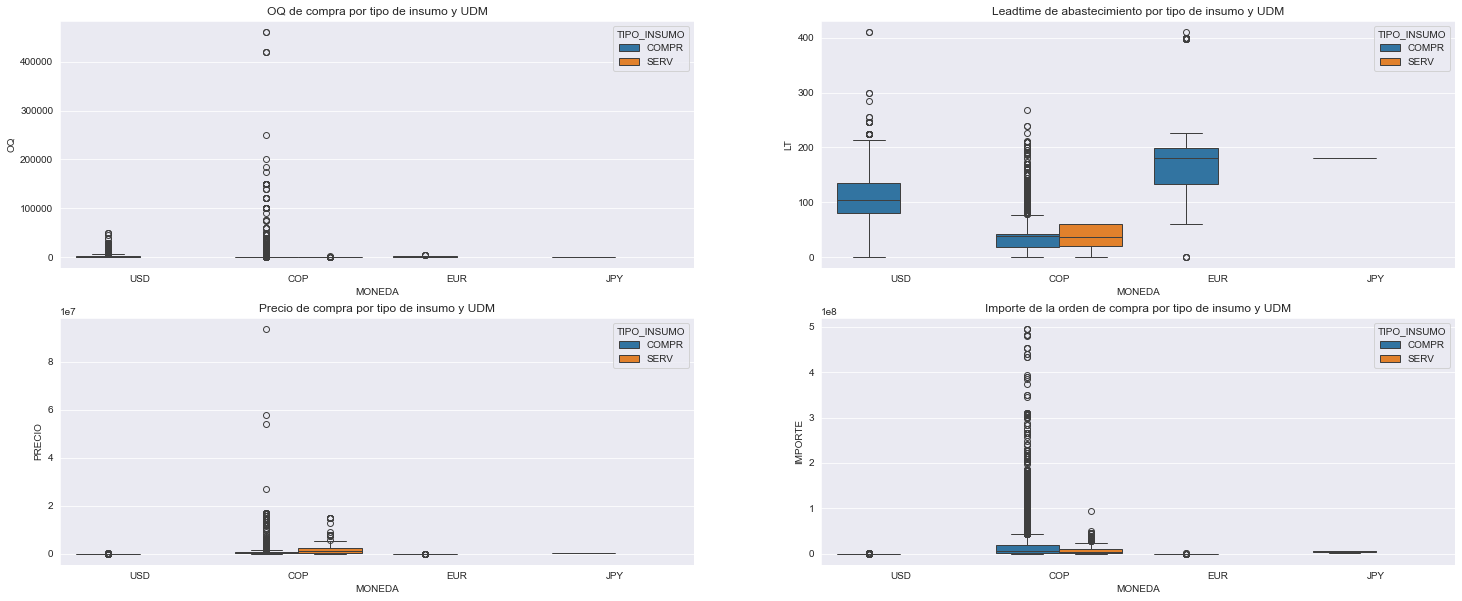

In [58]:
fig, axes = mp.subplots(nrows=2,ncols=2, figsize=(25, 10))

sb.boxplot(data = merged, x = 'MONEDA', y = 'OQ', hue = 'TIPO_INSUMO', dodge = True, ax=axes[0,0])
sb.boxplot(data = merged, x = 'MONEDA', y = 'LT', hue = 'TIPO_INSUMO', dodge = True, ax=axes[0,1])
sb.boxplot(data = merged, x = 'MONEDA', y = 'PRECIO', hue = 'TIPO_INSUMO', dodge = True, ax=axes[1,0])
sb.boxplot(data = merged, x = 'MONEDA', y = 'IMPORTE', hue = 'TIPO_INSUMO', dodge = True, ax=axes[1,1])

axes[0, 0].set_title('OQ de compra por tipo de insumo y UDM')
axes[0, 1].set_title('Leadtime de abastecimiento por tipo de insumo y UDM')
axes[1, 0].set_title('Precio de compra por tipo de insumo y UDM')
axes[1, 1].set_title('Importe de la orden de compra por tipo de insumo y UDM')

Se evalúa la relación entre las variables categóricas y 

Text(0.5, 1.0, 'Compras realizadas según el OQ del sistema según la su categoría de origen')

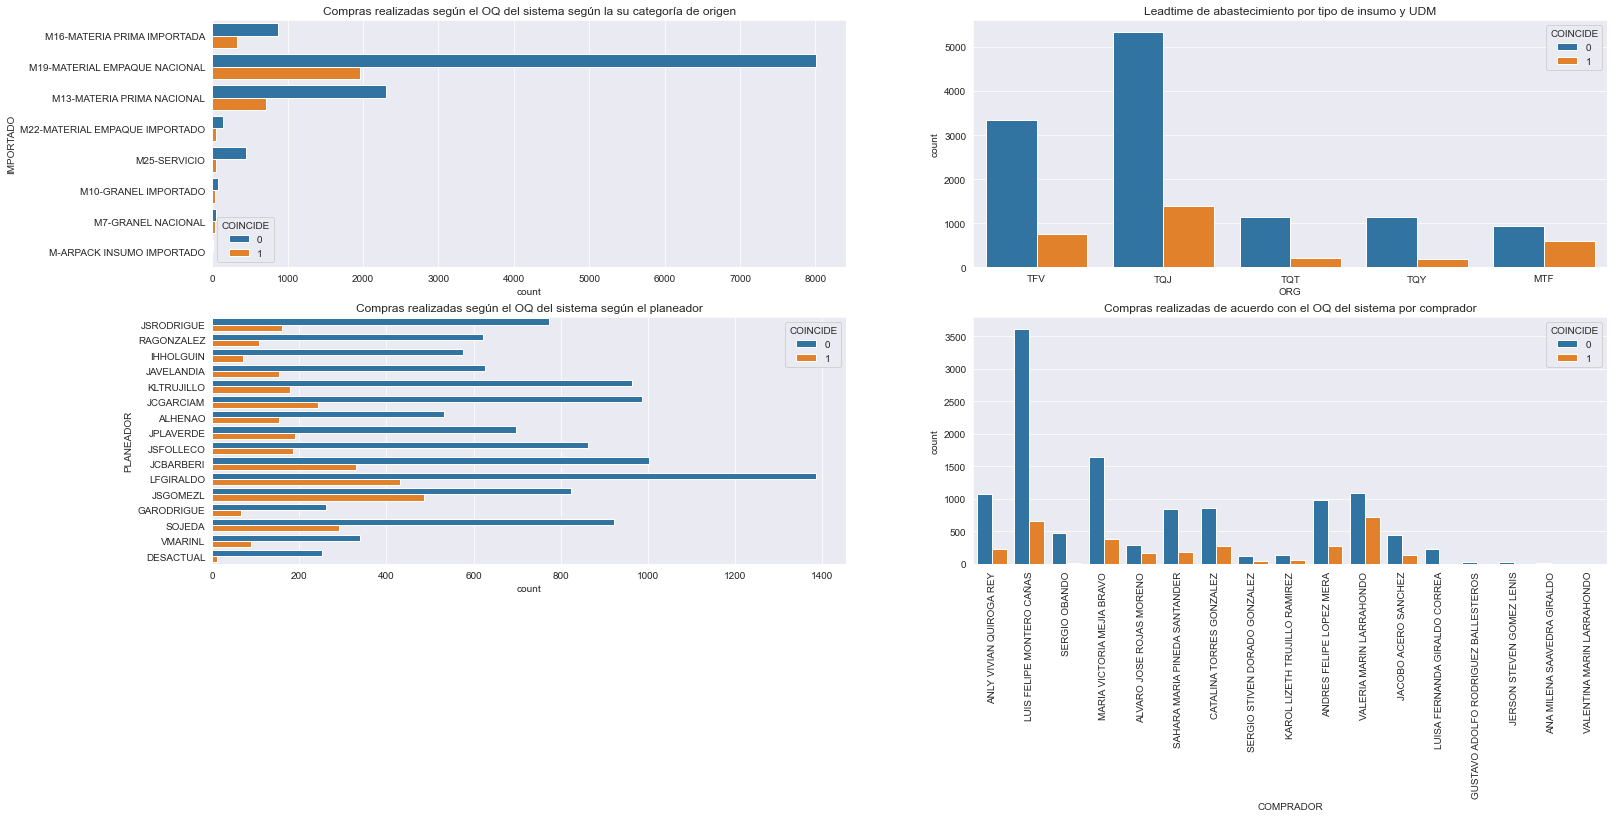

In [59]:
fig, axes = mp.subplots(nrows=2,ncols=2, figsize=(25, 10))

sb.countplot(data = merged, x = 'COMPRADOR', hue='COINCIDE', ax=axes[1,1])
sb.countplot(data = merged, y = 'IMPORTADO', hue='COINCIDE', ax=axes[0,0])
sb.countplot(data = merged, y= 'PLANEADOR', hue='COINCIDE', ax=axes[1,0])
sb.countplot(data = merged, x = 'ORG',hue='COINCIDE', dodge = True, ax=axes[0,1])

mp.xticks(rotation=90)

axes[1, 1].set_title('Compras realizadas de acuerdo con el OQ del sistema por comprador')
axes[0, 1].set_title('Leadtime de abastecimiento por tipo de insumo y UDM')
axes[1, 0].set_title('Compras realizadas según el OQ del sistema según el planeador')
axes[0, 0].set_title('Compras realizadas según el OQ del sistema según la su categoría de origen')

<AxesSubplot:xlabel='LT', ylabel='IMPORTE'>

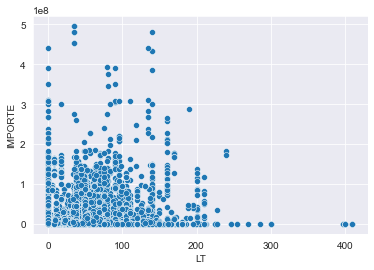

In [60]:
sb.scatterplot(data=merged, x="LT", y="IMPORTE")

In [61]:
import plotly.express as px

OQ                           float64
CANT_REC                     float64
CANT_ACEP                    float64
CANT_RECH                    float64
PRECIO                       float64
IMPORTE                      float64
AÑO_CREACION                 float64
AÑO_ENTREGA                  float64
MOQ                          float64
t_PROC                       float64
t_POST                       float64
t_TOTAL                      float64
CANT_MAX                     float64
MULTP_LOTE                   float64
COSTO_STD                    float64
FECHA_CREACION_ART    datetime64[ns]
OQ_CONFIG                    float64
LT                           float64
MES_CREACION                   int32
DIA_CREACION                   int32
MES_PROMESA                    int32
DIA_PROMESA                    int32
dtype: object

Se genera la matriz de correlaciones de las variables numéricas y se grafica con pyplot.express

In [63]:
corr_matrix = merged_num.corr()

fig = px.imshow(corr_matrix)

fig.show()

<AxesSubplot:>

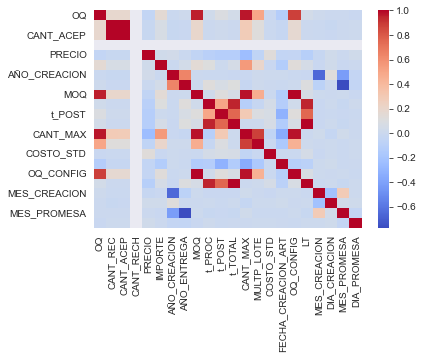

In [64]:
#Se prueba el gráfico de seaborn

sb.heatmap(corr_matrix, cmap="coolwarm")

### **Conclusiones y recomendaciones**

1. La información en general debe sufrir distintas transformaciones para ser trabajada con ella.
2. Existe información que parece ser errónea, nula o que no existe. En cuanto a la variable objetivo, se evidencia que existe muy poca coincidencia entre las transacciones y la configuración del sistema, especialmente por falta de configuración de la info en el sistema. Existen muchos valores configurados como '0', sin embargo, este está por fuera del dominio.
3. Debido a las particularidades de la operación: la moneda con la que se compra, el tipo de insumo, las unidades de medida, para poder avanzar con los análisis comparativo se debe adelantar normalizaciones, que nos facilite el trabajo en la misma escala y la comparación en igualdad de condiciones
4. Todas las variables numéricas parece presentar datos atípicos. Sin embargo, desde el conocimiento del negocio se es consciente del uso de materiales especializados de alto costo, lo que nos puede 